# 0. Iris Dataset.

# 1. Dataset pre-processing and visualization.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(data, columns=feature_names)
df['Target'] = target


In [3]:
# Check for missing values
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      Target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800

In [4]:
# Display basic statistics using .describe()
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      Target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


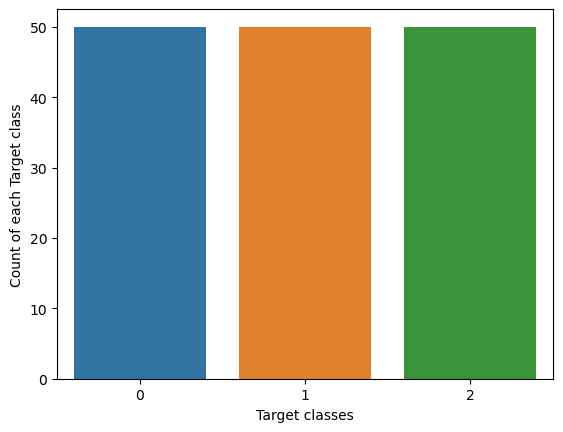

In [5]:
# Plot the count of each Target class
sns.countplot(x='Target', data=df)
plt.xlabel("Target classes")
plt.ylabel("Count of each Target class")
plt.show()

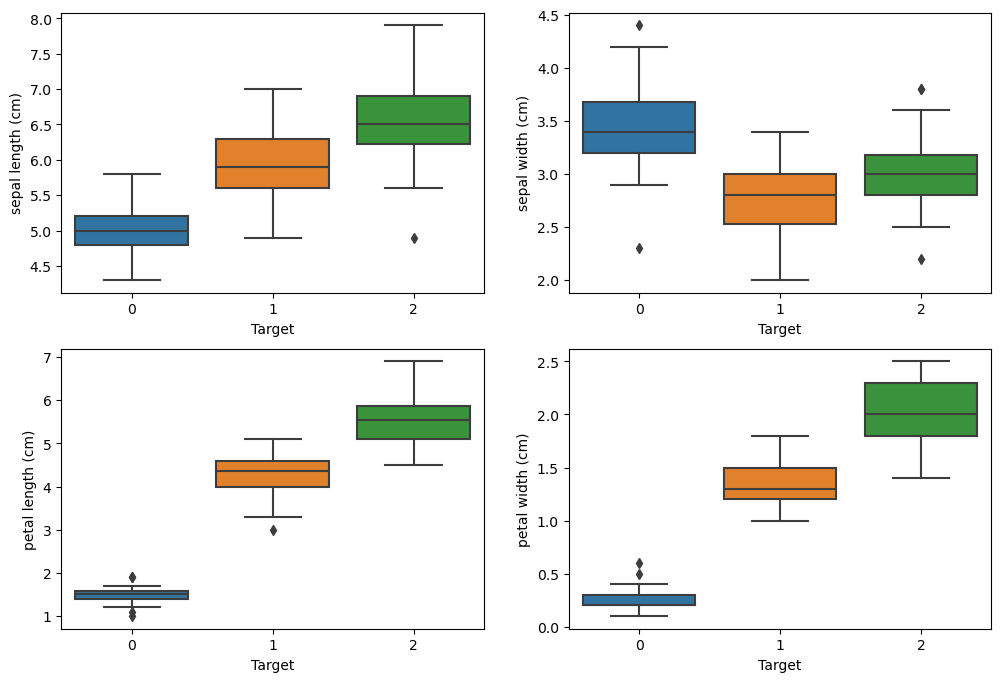

In [6]:
# Plot a box plot for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Target', y=feature, data=df)
plt.show()



/Users/lizhifan/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


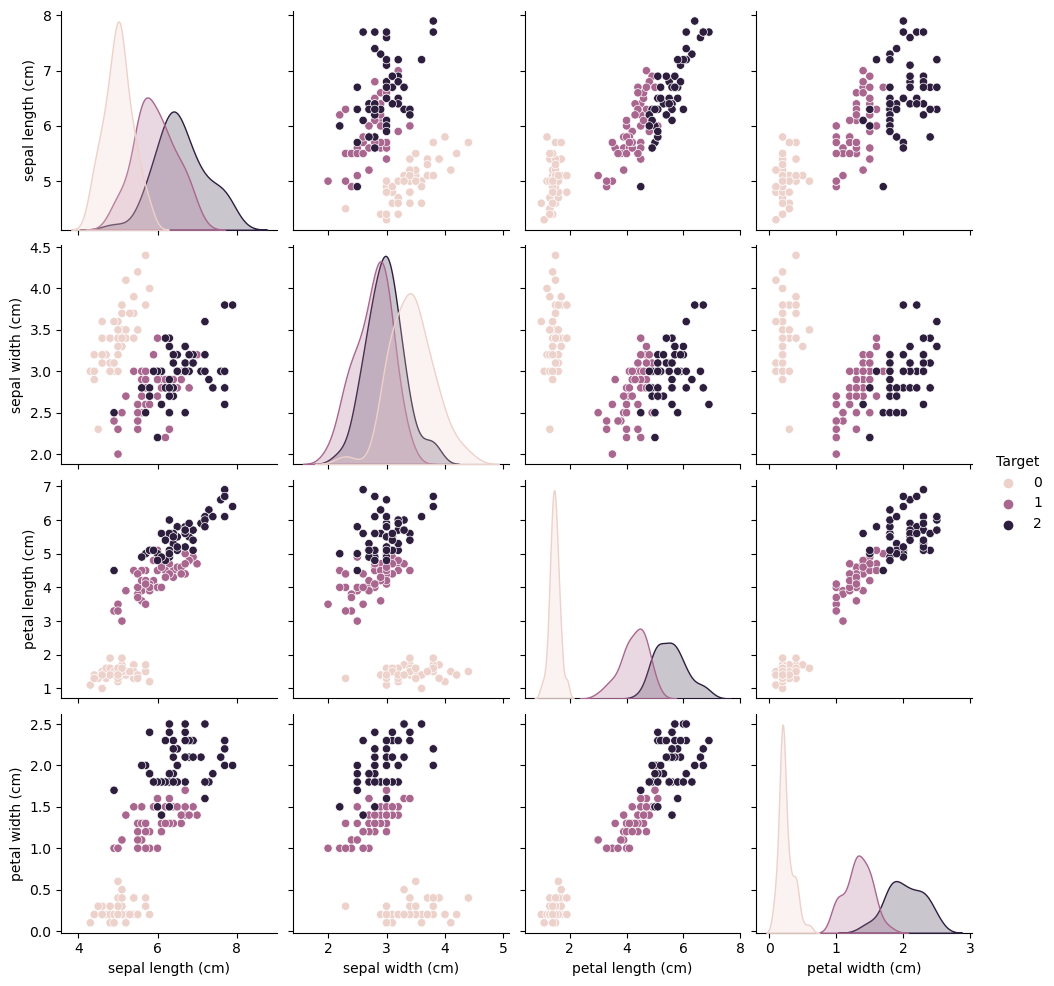

In [7]:
# create a pair plot using seaborn and define the color (hue) as the target
# Plot a pair plot
sns.pairplot(df, hue='Target', vars=feature_names)
plt.show()

In [11]:
# scale the features only using StandardScalar(). Last column should not be included.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[feature_names])


# 2. PCA Implementation.

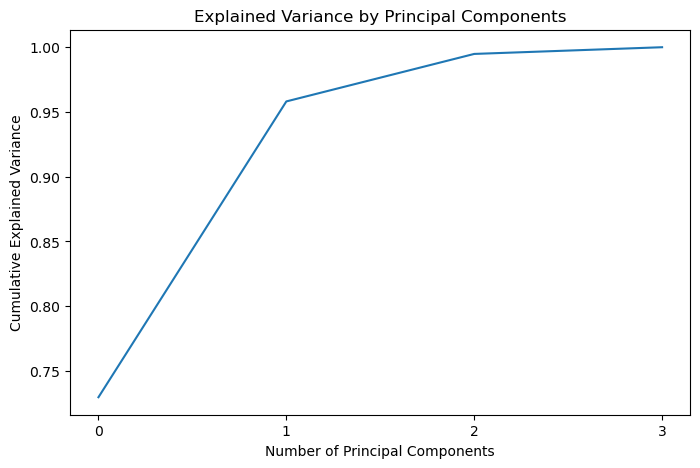

In [12]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(0, 4, 1))
plt.show()

In [13]:
# Create a DataFrame with principal components and view it
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Target'] = target

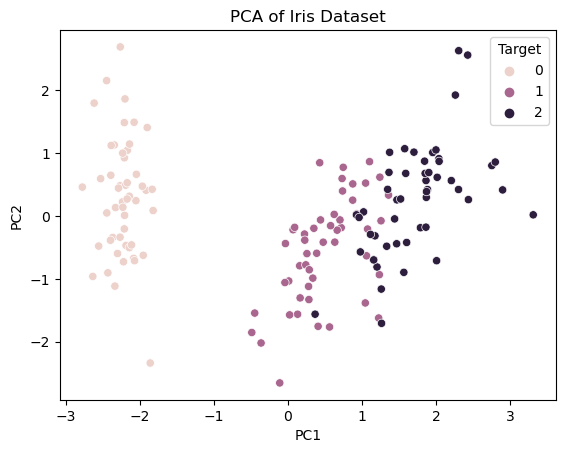

In [14]:
# Visualize the first two principal components

sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df)
plt.title('PCA of Iris Dataset')
plt.show()

General Notes:
* **random_state:** This parameter is used to control the random seed used by the random number generator. When you set a value for random_state, you ensure that the split will be reproducible. That is, if you run the code multiple times with the same random_state, you will get the same split every time. This is useful for reproducibility and debugging.

* **stratify:** This parameter is used for stratified sampling. When you set stratify to an array-like object, typically the target variable, the split will be such that the proportion of the classes in the training and testing sets will be the same as the proportion of classes in the entire dataset. This is particularly useful when dealing with imbalanced datasets to ensure that each class is adequately represented in both the training and testing sets.

In [15]:
# Create a train/test split using the PCA dataframe. Use 20% test size, random_state=20, and set stratify to be equal to the target column values.
X_train, X_test, Y_train, Y_test = train_test_split(pca_df.drop('Target', axis=1), pca_df['Target'], test_size=0.2, random_state=20, stratify=pca_df['Target'])


# 3. KNN Classifier with PCA.



Optimal k: 8


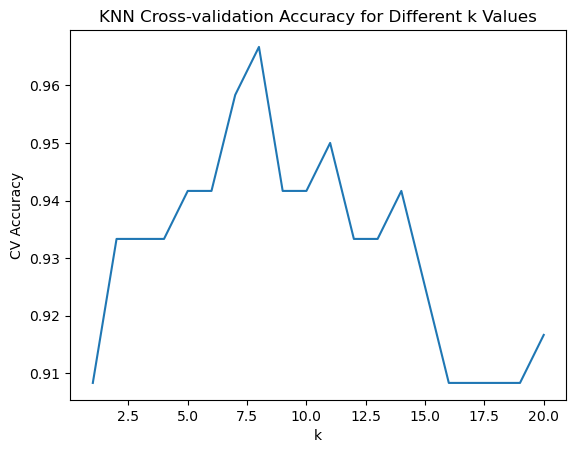

Test accuracy: 0.9666666666666667


In [16]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, Y_train, cv=5)
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal k: {optimal_k}')

plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.title('KNN Cross-validation Accuracy for Different k Values')
plt.show()

final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train, Y_train)
test_accuracy = final_model.score(X_test, Y_test)
print(f'Test accuracy: {test_accuracy}')
